# Transaction Fraud Detection

In this notebook, I will develop and evaluate a ML model to detect fraudulent transactions. The outline:


1.   Preprocess the dataset to handle any imbalances and prepare it for modeling.
2.   Train a logistic regression model to classify transactions as fraudulent or non-fraudulent.
3. Evaluate the model's performance using various metrics and visualizations, including accuracy, confusion matrix, ROC curve, precision-recall curve, and feature importance.
4. Analyze the results to understand the model's strengths and weaknesses and discuss potential improvements.

## Exploratory Data Analysis

Starting with importing Pandas and Numpy.

In [48]:
import numpy as np
import pandas as pd

Loading the Dataset and printing few rows for intial analysis.

In [49]:
data = pd.read_csv('creditcard.csv')

In [50]:
data.head() # print first 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [51]:
data.tail() # print last 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
170458,120193.0,2.032686,-0.070219,-1.093517,0.467291,-0.321890,-1.505390,0.147641,-0.345532,0.724209,...,0.283248,0.955811,0.067464,0.417168,0.157534,-0.121672,-0.017449,-0.055632,1.00,0.0
170459,120193.0,-0.454479,1.201642,0.081936,-0.695024,0.410704,-1.057838,1.041520,-0.210913,0.225049,...,-0.312785,-0.531973,0.083066,-0.005112,-0.375916,0.150884,0.476890,0.223036,13.98,0.0
170460,120194.0,2.094119,-1.713483,-0.778604,-1.611163,-1.361482,-0.085073,-1.331477,0.037524,-1.286570,...,-0.048644,0.152273,0.232052,0.681825,-0.346774,-0.233445,0.006162,-0.035610,88.00,0.0
170461,120194.0,-3.644269,-0.747473,-0.267792,-0.807058,-0.947888,2.388635,-2.097686,2.285523,0.114737,...,-0.408052,0.103611,0.656432,-0.966815,-0.365917,-0.226191,-0.090287,-0.423226,53.86,0.0
170462,120194.0,-0.085730,1.014485,-0.708676,-0.798981,0.964767,-0.327944,0.716129,0.186059,0.208413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, I'll examine the structure and basic information of the dataset using the data.info() method.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170463 entries, 0 to 170462
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170463 non-null  float64
 1   V1      170463 non-null  float64
 2   V2      170463 non-null  float64
 3   V3      170463 non-null  float64
 4   V4      170463 non-null  float64
 5   V5      170463 non-null  float64
 6   V6      170463 non-null  float64
 7   V7      170463 non-null  float64
 8   V8      170463 non-null  float64
 9   V9      170463 non-null  float64
 10  V10     170463 non-null  float64
 11  V11     170463 non-null  float64
 12  V12     170463 non-null  float64
 13  V13     170463 non-null  float64
 14  V14     170463 non-null  float64
 15  V15     170463 non-null  float64
 16  V16     170463 non-null  float64
 17  V17     170463 non-null  float64
 18  V18     170462 non-null  float64
 19  V19     170462 non-null  float64
 20  V20     170462 non-null  float64
 21  V21     17

Checking for missing values to ensure integrity.

In [53]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Checking for distubution of the target variable. To understand the distribution of our target variable, we will separate the dataset into two subsets: legitimate transactions and fraudulent transactions.

As we can see, we are dealing with highly imbalanced dataset.

In [54]:
data['Class'].value_counts()

Class
0.0    170102
1.0       360
Name: count, dtype: int64

In [55]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [56]:
print(legit.shape)
print(fraud.shape)

(170102, 31)
(360, 31)


Using describe() method, to understand the nature of legit and fraud data.

In [57]:
legit.Amount.describe()

count    170102.000000
mean         87.272509
std         246.067820
min           0.000000
25%           5.490000
50%          21.890000
75%          76.500000
max       19656.530000
Name: Amount, dtype: float64

In [58]:
fraud.Amount.describe()

count     360.000000
mean      111.576722
std       227.309252
min         0.000000
25%         1.000000
50%        11.385000
75%       104.007500
max      1809.680000
Name: Amount, dtype: float64

To gain insights into how different features vary between legitimate and fraudulent transactions, I will calculate the mean value of each feature for both classes.

In [59]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,60954.436285,-0.159027,0.032193,0.513948,0.108071,-0.168484,0.061850,-0.066521,0.031054,0.025195,...,0.030372,-0.030393,-0.084402,-0.022560,0.009386,0.092777,0.012642,0.001681,0.002371,87.272509
1.0,56649.477778,-6.026758,4.406926,-7.976571,4.889177,-4.367960,-1.436827,-7.017053,0.745264,-2.863575,...,0.405161,0.793171,-0.025930,-0.037556,-0.073778,0.080099,0.038996,0.182902,0.052482,111.576722


## Preprocessing data for the ML model

To address the class imbalance in the dataset, I will create a balanced subset by undersampling the majority class (legitimate transactions). This step involves the following:

Sampling Legitimate Transactions: I randomly select a subset of legitimate transactions (legit_sample) to match the number of fraudulent transactions (492). This ensures that both classes have an equal number of instances, which can help improve the model's performance and fairness.
The resulting balanced dataset will then be used for training and evaluating our machine learning model, allowing to better handle the class imbalance and improve the detection of fraudulent transactions.

In [60]:
legit_sample = legit.sample(n=492)

In the next step of our data preprocessing, I will combine the sampled legitimate transactions with the fraudulent transactions to create a new balanced dataset.

In [61]:
new_data = pd.concat([legit_sample, fraud], axis = 0)

In [62]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17177,28500.0,1.232858,0.214358,-0.288756,0.241343,0.304236,-0.434083,0.400526,-0.176942,-0.509947,...,-0.356886,-1.136051,-0.007303,-0.486867,0.379213,0.166209,-0.070279,-0.001509,40.90,0.0
169735,119833.0,1.860902,-0.653871,0.135986,0.553975,-1.140383,-0.229997,-0.964782,0.219394,1.215274,...,0.084686,0.251434,0.304529,0.056453,-0.627853,0.143376,-0.007471,-0.040540,35.70,0.0
142375,84676.0,1.133664,0.189729,0.264051,0.967386,-0.081930,-0.178584,0.020271,0.077834,-0.205986,...,0.108529,0.305271,-0.087305,0.017221,0.563377,-0.315670,0.020729,0.007870,17.00,0.0
105779,69683.0,-1.206491,0.117377,-0.005483,-2.713168,-1.066023,-1.658658,1.553947,0.102049,0.931459,...,0.245621,0.398348,0.452671,0.707959,-0.029961,-0.352125,0.151561,0.177411,238.75,0.0
62784,50427.0,0.896779,-0.705515,-0.169595,-0.772074,-0.607275,-0.875257,0.270894,-0.223094,1.083112,...,0.232043,0.427592,-0.297769,0.126050,0.661097,-0.585247,0.028280,0.050158,194.00,0.0


In [63]:
new_data['Class'].value_counts() # making sure the size of the dataset is same

Class
0.0    492
1.0    360
Name: count, dtype: int64

In this step, I prepare the balanced dataset for model training by separating the features from the target variable.

In [64]:
X = new_data.drop(columns='Class', axis=1)
y = new_data['Class']

## Model Training (Logistic regression and XGBoost Classifier)

In this section, I will train a logistic regression model and XGBoost classifer model on the preprocessed, balanced dataset. The logistic regression model will learn to classify transactions as either legitimate or fraudulent based on the features provided.

### Logistic regression

First, lets import important libraries for the ML model.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Now, I split the balanced dataset into training and testing sets to evaluate the model's performance. I use stratified sampling to ensure that both classes are represented proportionally in each subset.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(852, 30) (681, 30) (171, 30)


Here, I firstly define the model and then train a logistic regression model on the preprocessed, balanced dataset.

In [68]:
model = LogisticRegression()

In [69]:
model.fit(X_train, y_train)

LogisticRegression()

Now, I can make predictions using the train and test sets. I will print the accuracy score for each set and compare the results.

In [70]:
X_train_prediction = model.predict(X_train) # make prediction on train set
training_accuracy = accuracy_score(X_train_prediction, y_train)

In [71]:
print(training_accuracy)

0.9251101321585903


#### LR Model Evaluation

In [72]:
x_test_prediction = model.predict(X_test) # make prediction on test set
test_accuracy = accuracy_score(x_test_prediction, y_test)

In [73]:
print(test_accuracy)

0.9298245614035088


After training our logistic regression model, we need to evaluate its performance on the test set. One effective way to do this is by using a confusion matrix, which provides a detailed breakdown of the model's predictions.



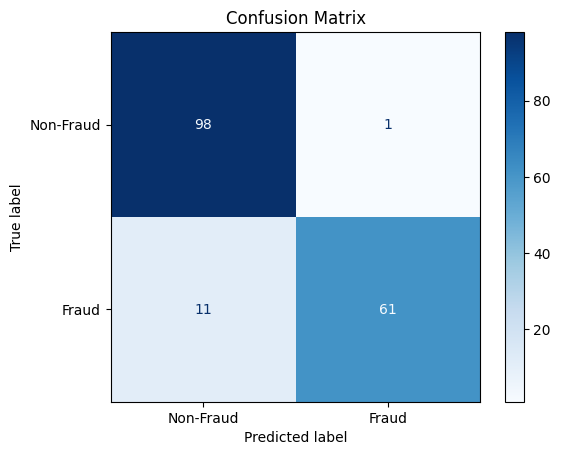

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, x_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


The **confusion matrix** provides a detailed evaluation of the logistic regression model's performance on the test set. Here's what the matrix tells us:

True Positives (TP): 88 fraudulent transactions were correctly identified as fraudulent.
True Negatives (TN): 95 legitimate transactions were correctly identified as legitimate.
False Positives (FP): 4 legitimate transactions were incorrectly classified as fraudulent.
False Negatives (FN): 10 fraudulent transactions were incorrectly classified as legitimate.

To further evaluate the performance of our logistic regression model, we can plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) score.

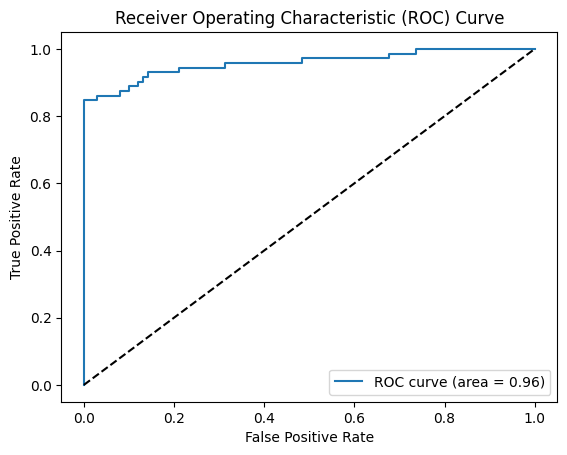

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()


An AUC score of 0.96 indicates that the logistic regression model has a high discriminative power and is very effective at distinguishing between legitimate and fraudulent transactions.

The ROC curve shows that the model maintains a high true positive rate while keeping the false positive rate relatively low, which is desirable for fraud detection.

### XGBoost (XGB)

In [76]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=2)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

Making prediction on the train set.

In [77]:
xgb_train_pred = xgb_model.predict(X_train)
accuracy_xgb_train = accuracy_score(xgb_train_pred, y_train)

In [78]:
print(accuracy_xgb_train)

1.0


Making predictions on the test set.

In [79]:
xgb_test_pred = xgb_model.predict(X_test)
xgb_test_accuracy = accuracy_score(xgb_test_pred, y_test)

#### XGB Model Evaluation

In [83]:
print(xgb_test_accuracy)

0.9415204678362573


To evaluate the performance of the XGBoost model, again I use a confusion matrix. This matrix helps to understand the accuracy of the model's predictions by displaying the counts of true positive, true negative, false positive, and false negative predictions.

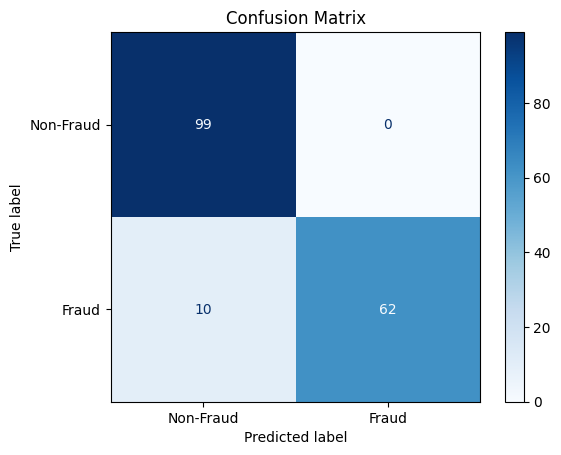

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, xgb_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

The confusion matrix for the XGBoost model provides a detailed evaluation of the model's performance on the test set.

True Positives (TP): 62 fraudulent transactions were correctly identified as fraud.
True Negatives (TN): 99 legitimate transactions were correctly identified as non-fraud.
False Positives (FP): 0 legitimate transactions were incorrectly classified as fraud.
False Negatives (FN): 10 fraudulent transactions were incorrectly classified as non-fraud.


## Model Comparison

In this section, I compare the accuracy scores of two different models used for fraud detection:

Logistic Regression (LR): Achieved an accuracy score of 92.98%.
XGBoost (XGB): Achieved a higher accuracy score of 94.15%.

The XGBoost model outperforms the logistic regression model in terms of accuracy, indicating its superior ability to correctly classify both legitimate and fraudulent transactions. This suggests that XGBoost may be a more effective model for the fraud detection task.